<a href="https://colab.research.google.com/github/swapnilprakashpatil/aai501_6proj/blob/Maurin/Japan_prophet_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import All Necessary Libraries
import numpy as np
import pandas as pd
from prophet import Prophet
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv" # Suitable for within Github repository
#file_path = '/content/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
df = pd.read_csv(file_path)

print(df.columns)
#df.head()

Index(['Country', 'Year', 'Expenditure-Share_of_Govt_spending',
       'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita',
       'Expenditure_Constant_2022', 'Region', 'Subregion', 'index_level',
       'total_rank_from_avg_rank', 'avg_rank', 'Deadliness_rank',
       'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank',
       'Deadliness_scaled_rank', 'Diffusion_scaled_rank', 'Danger_scaled_rank',
       'Fragmentation_scaled_rank', 'total_score_rank', 'Deadliness_raw',
       'Diffusion_raw', 'Danger_raw', 'Fragmentation_raw', 'Deadliness_scaled',
       'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
       'total_score'],
      dtype='object')


In [ ]:
# Using DataFrame.copy() create new dataframe to focus on spending over time by country
df2 = df[['Country', 'Year', 'Expenditure_Constant_2022']].copy() # Select three specific columns
df2.head()

,Country,Year,Expenditure_Constant_2022
0,Brazil,2000,15643.43168
1,Brazil,2001,18119.43481
2,Brazil,2002,18361.33076
3,Brazil,2003,14647.82954
4,Brazil,2004,15219.74744


In [ ]:
# select the top 5 countries that we are interested in
# Filter rows for each country and run model
#This notebook is for Japan
Japan_df = df2[df2['Country'] == 'Japan']

print(Japan_df)

     Country  Year  Expenditure_Constant_2022
2095   Japan  2000                39223.88182
2096   Japan  2001                39910.53300
2097   Japan  2002                40109.31747
2098   Japan  2003                40160.09355
2099   Japan  2004                39999.63906
2100   Japan  2005                39927.30939
2101   Japan  2006                39418.51887
2102   Japan  2007                38906.15248
2103   Japan  2008                38531.71847
2104   Japan  2009                39253.52860
2105   Japan  2010                39394.09712
2106   Japan  2011                39926.57329
2107   Japan  2012                39442.52986
2108   Japan  2013                39279.42167
2109   Japan  2014                39699.94813
2110   Japan  2015                40397.42151
2111   Japan  2016                40157.38200
2112   Japan  2017                39891.73017
2113   Japan  2018                41899.82809
2114   Japan  2019                43091.61172
2115   Japan  2020                

In [ ]:
# Import to_datetime from pandas
from pandas import to_datetime

#set up country dataframe to be used by prophet
Japan_df2= Japan_df[['Year', 'Expenditure_Constant_2022']]


# Rename the columns to 'ds' and 'y' for use by Prophet and convert time date time stamp expected by Prophet
Japan_df2 = Japan_df2.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
Japan_df2['ds'] = to_datetime(Japan_df2['ds'], format='%Y')

# Fit the model by instantiating a new Prophet object and disable irrelevant seasonality
model = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False)

# Call the fit method and pass in the historical dataframe. Fitting should take 1-5 seconds
model.fit(Japan_df2)

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfae3figa/2rgm4ld4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfae3figa/jj460xo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=492', 'data', 'file=/tmp/tmpfae3figa/2rgm4ld4.json', 'init=/tmp/tmpfae3figa/jj460xo7.json', 'output', 'file=/tmp/tmpfae3figa/prophet_model343bk3_r/prophet_model-20241206005634.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:56:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:56:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Simulate the trend of expenditures for this country to 2030
future = model.make_future_dataframe(periods=8, freq = "YE", include_history= True)

#Make predictions on the future dataframe
forecast = model.predict(future) #This line is added to predict values and store them in forecast dataframe

#View predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds          yhat    yhat_lower    yhat_upper
0  2000-01-01  39491.511511  38384.714299  40474.812691
1  2001-01-01  39266.766087  38212.927709  40323.054617
2  2002-01-01  40081.354290  39074.201869  41168.775861
3  2003-01-01  40097.818927  39097.487995  41258.499002
4  2004-01-01  39315.621909  38255.595892  40311.816234
5  2005-01-01  39090.876485  37947.143530  40150.224511
6  2006-01-01  39905.464689  38841.457531  40984.675179
7  2007-01-01  39922.202714  38881.081397  40990.641874
8  2008-01-01  39141.052286  38036.871307  40241.571739
9  2009-01-01  38918.915236  37846.125169  39961.381448
10 2010-01-01  39737.858122  38701.626654  40746.445430
11 2011-01-01  39891.188558  38848.606618  40893.421742
12 2012-01-01  39248.039527  38150.290367  40319.838452
13 2013-01-01  39164.677231  38089.512289  40142.560368
14 2014-01-01  40138.134943  39075.481331  41219.941858
15 2015-01-01  40314.610487  39184.638928  41344.458457
16 2016-01-01  39891.916284  38843.235556  40894

Text(0.5, 1.0, 'Japan Military Spending Past and Predicted')

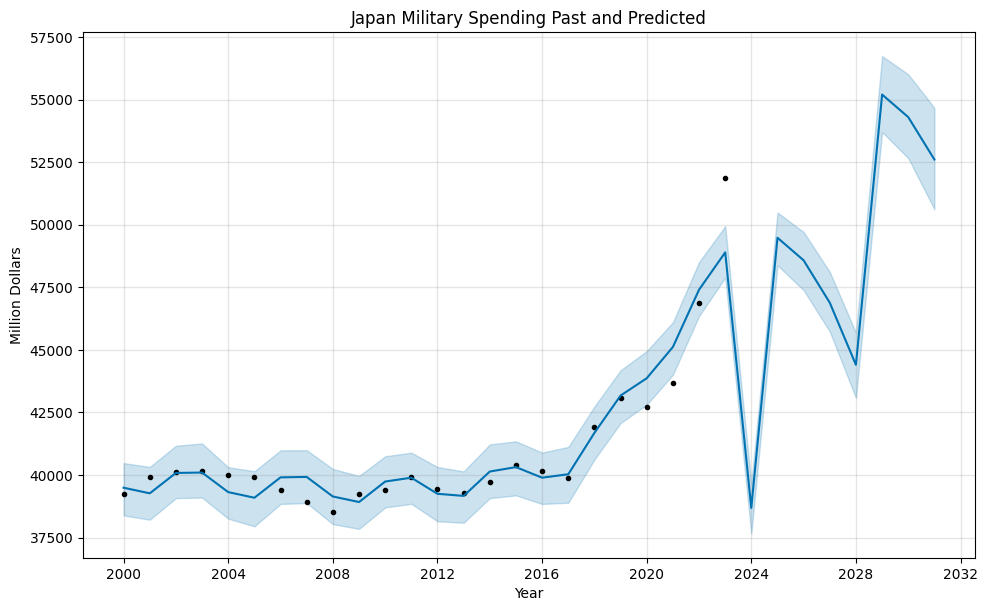

In [ ]:
fig1 = model.plot(forecast, xlabel= "Year", ylabel= "Million Dollars")
fig1.gca().set_title("Japan Military Spending Past and Predicted") # Set the title using the axes object

In [ ]:
#Evaluate the Prophet model using training and testing data sets

#split the data by a cut-off date of 2015 for training
cutoff_date = '2015-01-01'
train = Japan_df2[Japan_df2['ds'] < cutoff_date]
test = Japan_df2[Japan_df2['ds'] >= cutoff_date]


In [ ]:
#Fit the Prophet model on the training dataset
model_2 = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False) #add regressors if needed
model_2.fit(train[['ds', 'y']])


INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfae3figa/nx9pymyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfae3figa/oitgyjro.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74713', 'data', 'file=/tmp/tmpfae3figa/nx9pymyb.json', 'init=/tmp/tmpfae3figa/oitgyjro.json', 'output', 'file=/tmp/tmpfae3figa/prophet_modelm92b5zmk/prophet_model-20241206005856.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:58:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Forecast on the Test Period

#create a future dataframe and generate future dates that match the test period
# Make predictions on the test period; named forecast_2 to keep separate from
# Prophet simulation above
forecast_2 = model_2.predict(test[['ds']]) #This line is added to predict values and store them in forecast dataframe

In [ ]:
#Evaluate the Model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test['y'], forecast_2['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

#Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['y'], forecast_2['yhat']))
print(f"Root Mean Squared Error (MSE): {rmse}")

#Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test['y'], forecast_2['yhat']) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Mean Absolute Error (MAE): 4347.196359915077
Root Mean Squared Error (MSE): 5752.855352293156
Mean Absolute Percentage Error (MAPE): 9.42%


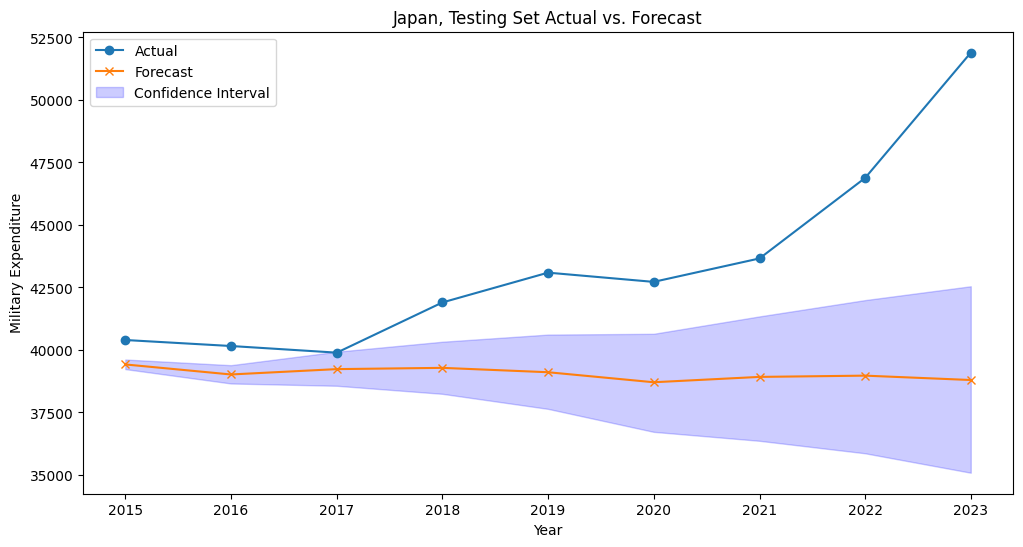

In [ ]:
#Visualize Results of Training and Testing

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual', marker = 'o')
plt.plot(forecast_2['ds'], forecast_2['yhat'], label='Forecast', marker = 'x')
plt.fill_between(
    forecast_2['ds'],
    forecast_2['yhat_lower'],
    forecast_2['yhat_upper'],
    color='blue', alpha=0.2, label='Confidence Interval'
)
plt.xlabel('Year')
plt.ylabel('Military Expenditure')
plt.title('Japan, Testing Set Actual vs. Forecast')
plt.legend()
plt.show()


In [ ]:
#evaluate the Prophet model using cross-validation function
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '5110 days', period = '365 days', horizon = '365 days',)


INFO:prophet:Making 9 forecasts with cutoffs between 2014-01-03 00:00:00 and 2022-01-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfae3figa/k__mrea2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfae3figa/0h692pfr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46186', 'data', 'file=/tmp/tmpfae3figa/k__mrea2.json', 'init=/tmp/tmpfae3figa/0h692pfr.json', 'output', 'file=/tmp/tmpfae3figa/prophet_modelqe2e46wn/prophet_model-20241206005930.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:59:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfae3figa/wle9egjj.json
DEBUG:cmdstanpy:input tempfi

In [ ]:
#show forcasts
#:There are 9 forecasts with cutoffs between 2014-01-03 and 2022-01-01
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-01,39419.891359,39233.628415,39616.653349,40397.42151,2014-01-03
1,2016-01-01,39831.749353,39535.730490,40130.539905,40157.38200,2015-01-03
2,2017-01-01,40319.283886,39999.044776,40643.270587,39891.73017,2016-01-03
3,2018-01-01,40486.223983,40172.911360,40811.845615,41899.82809,2017-01-02
4,2019-01-01,41431.496115,40920.676511,41955.067182,43091.61172,2018-01-02
5,2020-01-01,42226.821840,41691.240522,42783.818550,42722.20667,2019-01-02
6,2021-01-01,43080.631760,42560.073811,43628.965793,43660.12799,2020-01-02
7,2022-01-01,44446.579156,43943.262812,44961.086391,46880.19467,2021-01-01
8,2023-01-01,46811.730239,46224.647130,47401.445406,51887.97919,2022-01-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, rolling_window = .5)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,364 days,1.295617e+06,1138.251807,999.164564,0.023644,0.022667,0.023981,0.2500
1,365 days,8.330555e+06,2886.270125,2272.131315,0.046665,0.032592,0.048375,0.0625


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


Figure(1000x600)


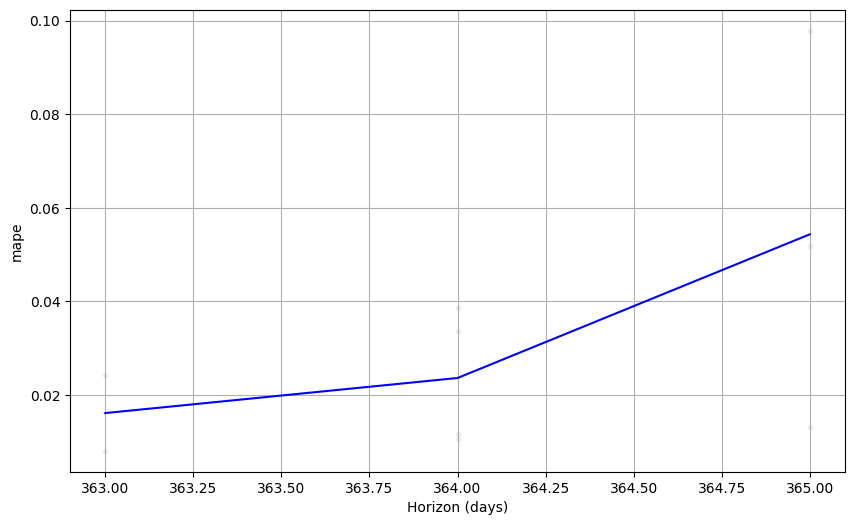

In [ ]:
#Visualize how the forcasting model performed
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')
print(fig3)

Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.